# EDA 1주차 과제

In [1]:
import pandas_profiling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import scale, minmax_scale

%matplotlib inline

In [2]:
pd.set_option('display.max_rows',500)

### 1. 데이터 불러오기

In [3]:
df_raw = pd.read_csv('C:/Users/jhr50/tobigs/week1/week1_EDA/과제data.csv')
df_raw.head()

,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,15,13,1,0.68,16.87,6.5,435
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384,22,33,1,0.89,15.12,4.9,909
2,1000010,Seoul,Gwanak-gu,True,Wangsung Church,30,37.481735,126.930121,22,33,1,0.89,15.12,4.9,909
3,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387,26,34,3,1.00,16.21,5.7,741
4,1000006,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343,26,34,3,1.00,16.21,5.7,741


### 2. 데이터 describe

In [4]:
# pr = df_raw.profile_report()
# pr.to_file('./pr_report.html')

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 15 columns):
 case_id                    117 non-null int64
province_x                  117 non-null object
city                        117 non-null object
group                       117 non-null bool
infection_case              117 non-null object
confirmed                   117 non-null int64
latitude_x                  117 non-null object
longitude_x                 117 non-null object
elementary_school_count     117 non-null int64
kindergarten_count          117 non-null int64
university_count            117 non-null int64
academy_ratio               117 non-null float64
elderly_population_ratio    117 non-null float64
elderly_alone_ratio         117 non-null float64
nursing_home_count          117 non-null int64
dtypes: bool(1), float64(3), int64(6), object(5)
memory usage: 13.0+ KB


In [6]:
df_raw.describe()

,case_id,confirmed,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
count,1.170000e+02,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.912830e+06,179.324786,27.965812,44.547009,1.641026,1.623333,17.026923,7.692308,702.427350
std,1.605029e+06,819.341523,19.200813,37.317486,2.110979,0.851856,5.479777,3.566297,633.461962
min,1.000001e+06,0.000000,4.000000,4.000000,0.000000,0.360000,9.080000,3.800000,47.000000
25%,1.000025e+06,5.000000,14.000000,17.000000,0.000000,1.000000,13.170000,5.300000,323.000000
50%,1.200005e+06,10.000000,23.000000,35.000000,1.000000,1.430000,16.180000,6.700000,593.000000
75%,1.500005e+06,39.000000,33.000000,58.000000,3.000000,1.910000,20.290000,9.000000,765.000000
max,6.100007e+06,4511.000000,110.000000,195.000000,10.000000,4.180000,36.550000,21.000000,3088.000000


##### confirmed max값 확인

In [7]:
df_raw.query('confirmed>1000')
# 지역 위치가 동일한데 region 컬럼 값들이 다를 수 있는건가?
# region 원본데이터에 따르면, 대구 남구의 지역 정보는 index 46에 해당됨

,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
45,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.84008,128.5667,21,27,4,1.24,19.13,7.9,475
46,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.84008,128.5667,11,15,2,0.85,22.49,10.4,345
47,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.84008,128.5667,23,44,4,2.63,16.76,7.5,427
48,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.84008,128.5667,30,44,1,3.23,11.42,4.8,765


### 3. 결측치 처리
- case_id가 중복되는 경우 region 원본 데이터와 맞지 않는 행 제거

In [8]:
# case_id 중복 찾기 / case_id 앞에 space 넣어줘야 error 발생 안함

#df_raw[df_raw.duplicated([' case_id'])] # 중복되는 데이터 중 first는 출력 안됨 
df_du = df_raw[df_raw.duplicated([' case_id'], keep=False)]
df_du
#유효한 행: index 18, 24, 30, 40, 46, 52, 60, 65, 70, 75, 77, 84

,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
18,1000015,Seoul,Jung-gu,True,Jung-gu Fashion Company,7,37.562405,126.984377,12,14,2,0.94,18.42,7.4,728
19,1000015,Seoul,Jung-gu,True,Jung-gu Fashion Company,7,37.562405,126.984377,4,4,0,1.36,26.00,13.0,182
20,1000015,Seoul,Jung-gu,True,Jung-gu Fashion Company,7,37.562405,126.984377,10,12,0,4.03,20.29,9.6,594
21,1000015,Seoul,Jung-gu,True,Jung-gu Fashion Company,7,37.562405,126.984377,14,17,0,0.80,14.14,6.7,177
22,1000015,Seoul,Jung-gu,True,Jung-gu Fashion Company,7,37.562405,126.984377,27,43,1,1.43,18.39,8.2,518
23,1000015,Seoul,Jung-gu,True,Jung-gu Fashion Company,7,37.562405,126.984377,21,37,0,2.03,14.15,6.5,323
24,1000023,Seoul,Jung-gu,True,KB Life Insurance,13,37.560899,126.966998,12,14,2,0.94,18.42,7.4,728
25,1000023,Seoul,Jung-gu,True,KB Life Insurance,13,37.560899,126.966998,4,4,0,1.36,26.00,13.0,182
26,1000023,Seoul,Jung-gu,True,KB Life Insurance,13,37.560899,126.966998,10,12,0,4.03,20.29,9.6,594
27,1000023,Seoul,Jung-gu,True,KB Life Insurance,13,37.560899,126.966998,14,17,0,0.80,14.14,6.7,177


In [9]:
# 유효한 데이터 확인
valid = list([18, 24, 30, 40, 46, 52, 60, 65, 70, 75, 77, 84])
df_valid = df_du.loc[valid]
df_valid

,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
18,1000015,Seoul,Jung-gu,True,Jung-gu Fashion Company,7,37.562405,126.984377,12,14,2,0.94,18.42,7.4,728
24,1000023,Seoul,Jung-gu,True,KB Life Insurance,13,37.560899,126.966998,12,14,2,0.94,18.42,7.4,728
30,1000032,Seoul,Jung-gu,True,Seoul City Hall Station safety worker,3,37.565699,126.977079,12,14,2,0.94,18.42,7.4,728
40,1000030,Seoul,Gangseo-gu,True,SJ Investment Call Center,0,37.559649,126.835102,36,56,1,1.17,14.39,5.7,1080
46,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.84008,128.5667,11,15,2,0.85,22.49,10.4,345
52,1200003,Daegu,Seo-gu,True,Hansarang Convalescent Hospital,124,35.885592,128.556649,17,23,0,0.83,21.29,10.1,374
60,1500002,Daejeon,Seo-gu,True,Dunsan Electronics Town,13,36.3400973,127.3927099,39,78,3,1.81,12.05,4.9,1123
65,1500003,Daejeon,Seo-gu,True,Orange Town,7,36.3398739,127.3819744,39,78,3,1.81,12.05,4.9,1123
70,1500004,Daejeon,Seo-gu,True,Dreaming Church,4,36.346869,127.368594,39,78,3,1.81,12.05,4.9,1123
75,1500005,Daejeon,Seo-gu,True,Korea Forest Engineer Institute,3,36.358123,127.388856,39,78,3,1.81,12.05,4.9,1123


In [10]:
# invalid 데이터 삭제
invalid = list(set(list(df_du.index)) - set(valid))
invalid
df_du.loc[invalid]

df = df_raw.drop(index=invalid)
df

,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,15,13,1,0.68,16.87,6.5,435
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384,22,33,1,0.89,15.12,4.9,909
2,1000010,Seoul,Gwanak-gu,True,Wangsung Church,30,37.481735,126.930121,22,33,1,0.89,15.12,4.9,909
3,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387,26,34,3,1.00,16.21,5.7,741
4,1000006,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343,26,34,3,1.00,16.21,5.7,741
5,1000035,Seoul,Guro-gu,True,Daezayeon Korea,3,37.486837,126.893163,26,34,3,1.00,16.21,5.7,741
6,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209,30,43,0,2.26,13.55,5.5,816
7,1000026,Seoul,Yangcheon-gu,True,Biblical Language study meeting,3,37.524623,126.843118,30,43,0,2.26,13.55,5.5,816
8,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374,23,26,1,0.95,17.89,7.2,485
9,1000008,Seoul,Dongdaemun-gu,True,Dongan Church,17,37.592888,127.056766,21,31,4,1.06,17.26,6.7,832


In [11]:
df.info()

# 117개 -> 68개 : 49개 데이터 제거

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 116
Data columns (total 15 columns):
 case_id                    68 non-null int64
province_x                  68 non-null object
city                        68 non-null object
group                       68 non-null bool
infection_case              68 non-null object
confirmed                   68 non-null int64
latitude_x                  68 non-null object
longitude_x                 68 non-null object
elementary_school_count     68 non-null int64
kindergarten_count          68 non-null int64
university_count            68 non-null int64
academy_ratio               68 non-null float64
elderly_population_ratio    68 non-null float64
elderly_alone_ratio         68 non-null float64
nursing_home_count          68 non-null int64
dtypes: bool(1), float64(3), int64(6), object(5)
memory usage: 8.0+ KB


### 4. 데이터 탐색 및 시각화

In [12]:
# pr2 = df.profile_report()
# pr2.to_file('./pr_report_afterprep.html')

> 1) Heatmap

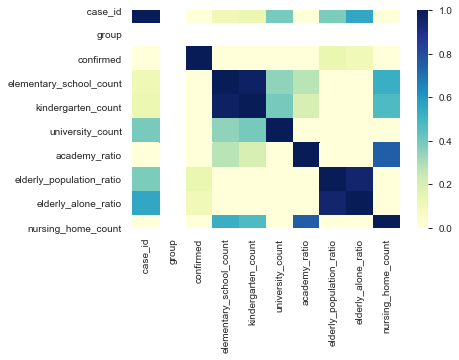

In [13]:
sns.heatmap(df.corr(), vmin=0, vmax=1,  cmap="YlGnBu")

# 초등학교 수와 유치원의 수, 노인인구비율과 독거노인비율 간의 상관관계가 높아보임
# 요양병원 수와 초등학교,유치원,학원 간의 상관관계 있어보임. 

> 2) Pair plot

C:\Users\jhr50\Anaconda3\lib\site-packages\numpy\lib\histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


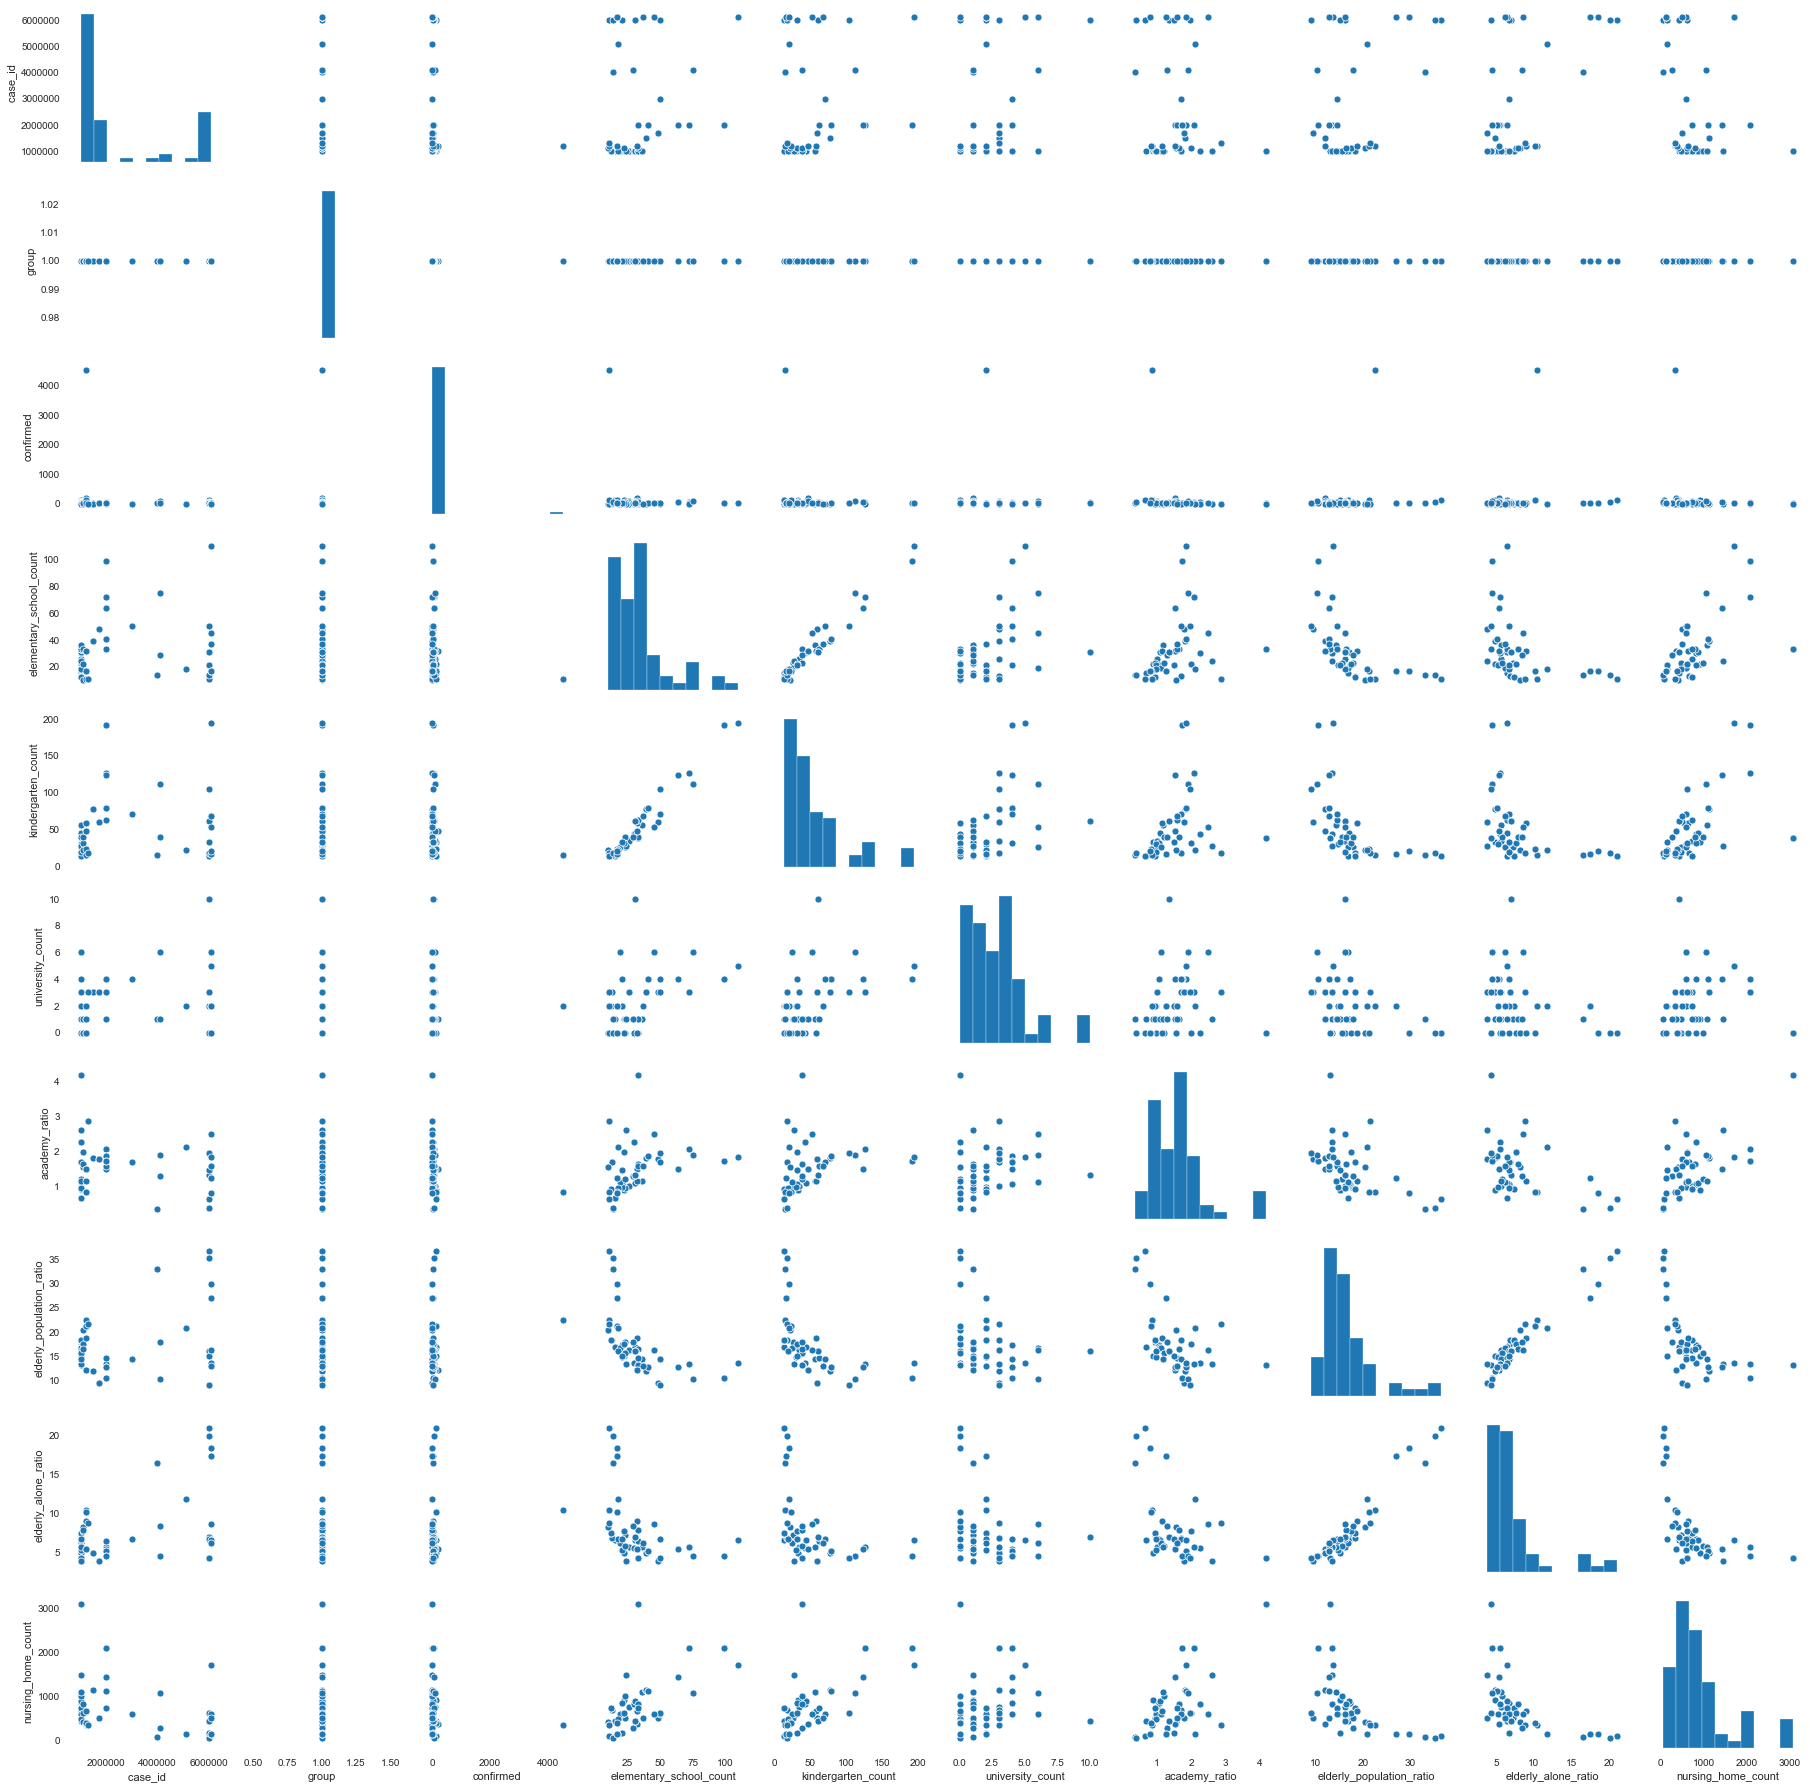

In [14]:
sns.pairplot(df)

In [15]:
df.corr()

,case_id,group,confirmed,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
case_id,1.000000,NaN,-0.076443,0.114634,0.130096,0.390305,-0.150231,0.382288,0.552096,-0.344177
group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
confirmed,-0.076443,NaN,1.000000,-0.130617,-0.113756,-0.026659,-0.135872,0.136431,0.105504,-0.107371
elementary_school_count,0.114634,NaN,-0.130617,1.000000,0.973424,0.348567,0.274185,-0.552580,-0.404646,0.523848
kindergarten_count,0.130096,NaN,-0.113756,0.973424,1.000000,0.392528,0.197761,-0.532407,-0.391598,0.473389
university_count,0.390305,NaN,-0.026659,0.348567,0.392528,1.000000,-0.069497,-0.251054,-0.200899,-0.074640
academy_ratio,-0.150231,NaN,-0.135872,0.274185,0.197761,-0.069497,1.000000,-0.451975,-0.423480,0.752511
elderly_population_ratio,0.382288,NaN,0.136431,-0.552580,-0.532407,-0.251054,-0.451975,1.000000,0.953647,-0.495402
elderly_alone_ratio,0.552096,NaN,0.105504,-0.404646,-0.391598,-0.200899,-0.423480,0.953647,1.000000,-0.511931
nursing_home_count,-0.344177,NaN,-0.107371,0.523848,0.473389,-0.074640,0.752511,-0.495402,-0.511931,1.000000


- 초등학교 수와 유치원의 수 : 0.973424	
- 노인 인구 비율과 독거 노인 비율 : 0.953647	
- 학원 비율과 요양병원 수 : 0.752511	
- 초등학교 수와 노인 인구 비율 : -0.552580
- 유치원 수와 노인 인구 비율 : -0.532407	
- 초등학교 수와 요양 병원 수 : 0.523848
- 독거 노인 비율과 요양 병원 수 : -0.511931	
- 노인 인구 비율과 요양 병원 수 : -0.495402

** 상관계수 절댓값이 큰 순서대로 나열

1. 학교와 유치원 및 요양시설 등의 사회적 인프라가 갖춰진 지역의 경우 노인의 거주 비율이 낮은 편이다.
2. 초등학교 및 유치원의 경우 생각보다 학원과 상관성이 높지 않았는데, count vs ratio 단위의 차이 때문인지 고려해볼 필요가 있다.
3. 상관계수가 높지는 않으나, 확진자 수의 경우 노인 관련 변수들만이 양의 상관관계를 갖는다. 


> 3) 지역별 감염 case 수

In [16]:
df.groupby(['province_x']).size()

province_x
Busan                 3
Chungcheongbuk-do     1
Chungcheongnam-do     2
Daegu                 5
Daejeon               4
Gangwon-do            1
Gwangju               1
Gyeonggi-do           9
Gyeongsangbuk-do      7
Gyeongsangnam-do      6
Jeollanam-do          1
Sejong                2
Seoul                26
dtype: int64

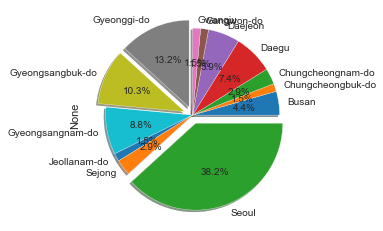

In [17]:
df.groupby(['province_x']).size().plot.pie(autopct='%.1f%%', shadow=True, explode=(0,0,0,0,0,0,0,0.1,0.1,0,0,0,0.1))
#plt.axis('equal')

# 서울, 경기도, 경상북도 순으로 코로나 감염 케이스 수가 많음. 

> 4) 지역별 확진자 수

In [18]:
df.groupby(['province_x']).sum()['confirmed']

province_x
Busan                  50
Chungcheongbuk-do      11
Chungcheongnam-do     112
Daegu                4971
Daejeon                27
Gangwon-do              4
Gwangju                 5
Gyeonggi-do           275
Gyeongsangbuk-do      332
Gyeongsangnam-do       44
Jeollanam-do            2
Sejong                 39
Seoul                 637
Name: confirmed, dtype: int64

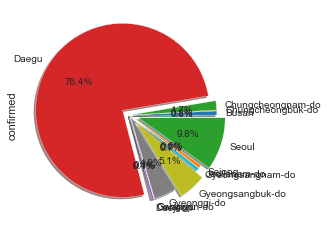

In [19]:
df.groupby(['province_x']).sum()['confirmed'].plot.pie(autopct='%.1f%%', shadow=True, explode=(0,0,0,0.1,0,0,0,0,0.1,0,0,0,0.1))

# 대구, 서울, 경상북도 순으로 감염자 수가 많음

3,4) 감염 case 수의 경우 대구는 7.4% 비율을 차지하며 서울, 경기에 비해 많은 편은 아니지만, 확진자 수는 76.4%로 가장 많다.<br>
즉, 특정 감염 경로로 인해 감염 확산 정도가 컸음을 알 수 있다.  

> 5) (서울 한정) 도시별 감염 case 수

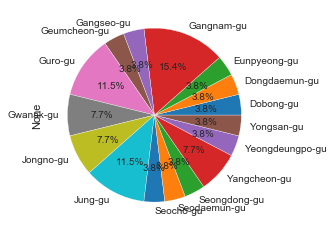

In [20]:
seoul = df[df['province_x']=='Seoul']
seoul.groupby(['city']).size().plot.pie(autopct='%1.1f%%')
# 코로나 감염 케이스 수 상위 3개 : 강남구, 구로구, 중구

> 6) (서울 한정) 도시별 확진자 수

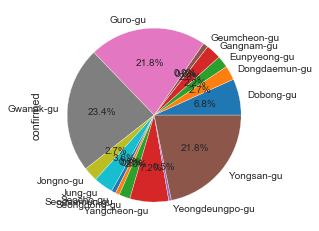

In [21]:
seoul.groupby(['city']).sum()['confirmed'].plot.pie(autopct='%1.1f%%')

# 코로나 감염 확진자 수 상위 3개 : 관악구, 구로구, 용산구

5,6) 강남구의 경우 감염 case 수가 가장 많지만 그에 반해, 확진자 수는 전체 확진자 수 대비 큰 비중을 차지하지 않는다. <br>
즉, 강남구에서 대규모 집단 감염이 발생한 것으로 보이지 않는다. 

> 7) 지역별 평균 초등학교 수 


[Text(0, 0, 'Busan'),
 Text(0, 0, 'Chungcheongbuk-do'),
 Text(0, 0, 'Chungcheongnam-do'),
 Text(0, 0, 'Daegu'),
 Text(0, 0, 'Daejeon'),
 Text(0, 0, 'Gangwon-do'),
 Text(0, 0, 'Gwangju'),
 Text(0, 0, 'Gyeonggi-do'),
 Text(0, 0, 'Gyeongsangbuk-do'),
 Text(0, 0, 'Gyeongsangnam-do'),
 Text(0, 0, 'Jeollanam-do'),
 Text(0, 0, 'Sejong'),
 Text(0, 0, 'Seoul')]

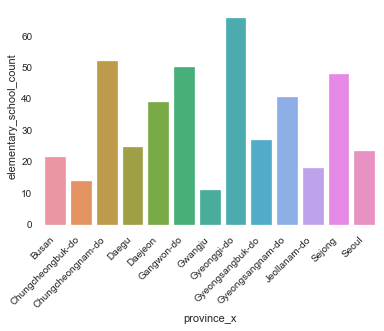

In [22]:
elementary = pd.DataFrame(df.groupby(['province_x']).mean()['elementary_school_count'])
elementary.reset_index(level=['province_x'], inplace=True)
#elementary.plot(kind = 'bar')
chart = sns.barplot(x='province_x', y='elementary_school_count', data=elementary)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# 경기, 충청남도 순으로 많았는데 지역 내 전체 도시 평균이 아닌 감염이 발생한 도시 데이터만을 가지고 평균낸 것이라 의미있는 정보라 할 수 없을 것 같음...

> 8) 독거노인비율과 노인인구비율 상관성

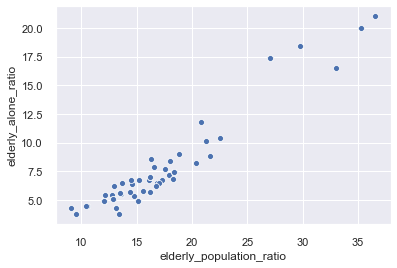

In [23]:
sns.set(style='darkgrid')
sns.scatterplot(x='elderly_population_ratio', y='elderly_alone_ratio', data=df)

# 강한 양의 상관관계가 나타남

> 9) 감염 case id에 따른 확진자 수 

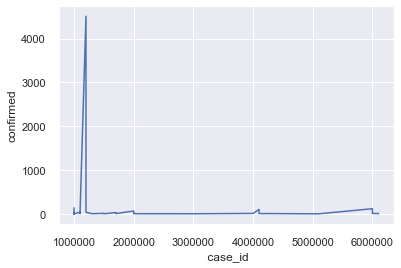

In [24]:
sns.lineplot(x=' case_id', y='confirmed', data=df)
#plt.ylim(-20,500)

# case_id가 시간적 순서에 따라 정해진 변수라면, 시간의 흐름에 따른 확진자 수 그래프로서 활용 가능하지 않을까
# -> case_id를 sort해보니까 지역과 관련된 변수였음

> 10) 초등학교 수/유치원 수와 독거노인 비율 상관성

Text(0, 0.5, 'count')

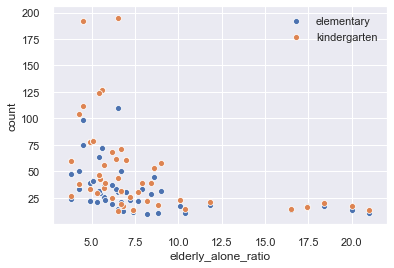

In [25]:
ax = plt.subplot()
sns.scatterplot(x='elderly_alone_ratio', y='elementary_school_count', data=df, label='elementary')
sns.scatterplot(x='elderly_alone_ratio', y='kindergarten_count', data=df, label='kindergarten')
ax.set_ylabel('count')

# 독거노인 비율이 낮은 경우는 초등학교/유치원 수의 범위가 다양한 것에 반해, 독거노인비율이 높은 경우는 초등학교/유치원 수가 적은 경우에 한한다다
# why? 아이들을 양육할 경우 조부모의 도움을 받을 가능성 높음. -> 함께 살 가능성 높음 -> 독거노인 비율이 낮음 ...(?)

> 11) 코로나 발생 지역 시각화

In [26]:
import folium

In [27]:
# 위도,경도 없는 값 확인
df[df['latitude_x']=='-']
df[df['longitude_x']=='-']

,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
15,1000018,Seoul,Gangnam-gu,True,Gangnam Yeoksam-dong gathering,6,-,-,33,38,0,4.18,13.17,4.3,3088
37,1000020,Seoul,Geumcheon-gu,True,Geumcheon-gu rice milling machine manufacture,6,-,-,18,19,0,0.96,16.15,6.7,475
39,1000027,Seoul,Seocho-gu,True,Seocho Family,5,-,-,24,27,1,2.60,13.39,3.8,1465
92,2000019,Gyeonggi-do,Seongnam-si,True,Seongnam neighbors gathering,5,-,-,72,127,3,2.08,13.52,5.6,2095
110,6000010,Gyeongsangbuk-do,Gumi-si,True,Gumi Elim Church,10,-,-,50,104,3,1.96,9.08,4.3,616


In [28]:
# imputation

# index 15 서울 강남구 
df.loc[15,['latitude_x','longitude_x']] = [37.50, 127.03]

# index 37 서울 금천구 
df.loc[37,['latitude_x','longitude_x']] = [37.46, 126.90]

# index 39 서울 서초구 
df.loc[39,['latitude_x','longitude_x']] = [37.48, 127.02]

# index 92 경기도 성남시
df.loc[92,['latitude_x','longitude_x']] = [37.41, 127.11]

# index 110 경상북도 구미시
df.loc[110,['latitude_x','longitude_x']] = [36.20, 128.35]


In [29]:
center = [37.541, 126.986]
m= folium.Map(location=center, zoom_start=7)

for i in df.index:
    folium.CircleMarker(
        location = [df['latitude_x'][i], df['longitude_x'][i]],
        radius = 10,
        tooltip='Confirmed: {}'.format(df['confirmed'][i]),
        fill=True
    ).add_to(m)

m

<map 예시>
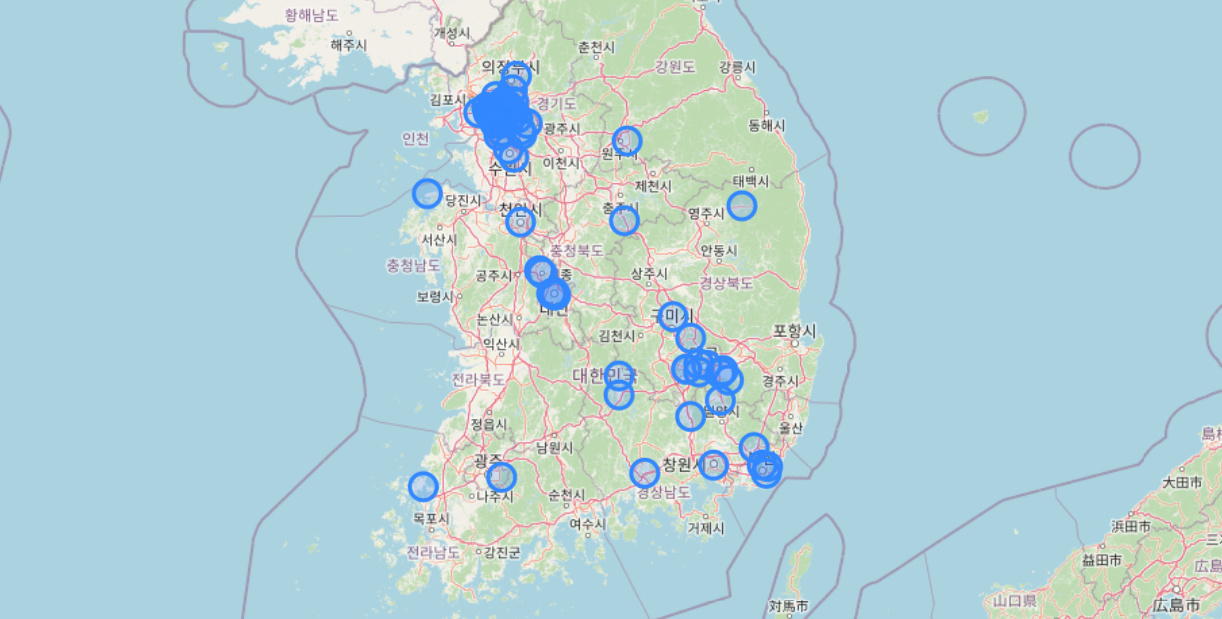

### 5. feature 생성
* ~~case_id에 따른 확진자 수 누적 변수~~
* 초등학교 수 + 유치원 수 = 미취학 및 저학년 대상 교육기관 수
* 교육열 : 학원 비율 / 미취학 및 초등학생 대상 교육기관 수 (scaling 적용)
* 노인 대상 요양시설 접근성 : 노인인구비율 / 요양병원 수 (scaling 적용)
* 지역별 감염 확산 정도 : 지역별 확진자 수 / 지역별 감염 case 수 
* 도시별 감염 확산 정도 : 도시별 확진자 수 / 도시별 감염 case 수 

> 1) ~~case_id에 따른 확진자 수 누적 변수~~

In [30]:
df = df.sort_values(by=' case_id')

In [31]:
df['confirmed_cumsum'] = df['confirmed'].cumsum()

In [32]:
df.head()

,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,confirmed_cumsum
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,15,13,1,0.68,16.87,6.5,435,139
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384,22,33,1,0.89,15.12,4.9,909,258
3,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387,26,34,3,1.00,16.21,5.7,741,353
6,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209,30,43,0,2.26,13.55,5.5,816,396
8,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374,23,26,1,0.95,17.89,7.2,485,439


In [33]:
df.drop('confirmed_cumsum', axis=1, inplace=True)

> 2) 미취학 및 초등학생 대상 교육기관 수

In [34]:
df['elementary_kindergarten_sum'] = df['elementary_school_count']+df['kindergarten_count']

In [35]:
df.head()

,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,elementary_kindergarten_sum
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,15,13,1,0.68,16.87,6.5,435,28
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384,22,33,1,0.89,15.12,4.9,909,55
3,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387,26,34,3,1.00,16.21,5.7,741,60
6,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209,30,43,0,2.26,13.55,5.5,816,73
8,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374,23,26,1,0.95,17.89,7.2,485,49


> 3) 교육열

In [36]:
df['education'] = df['academy_ratio'] / df['elementary_kindergarten_sum']
df.head()

# ratio vs count 단위 차이 -> scaling 필요해보임. 

,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,elementary_kindergarten_sum,education
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,15,13,1,0.68,16.87,6.5,435,28,0.024286
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384,22,33,1,0.89,15.12,4.9,909,55,0.016182
3,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387,26,34,3,1.00,16.21,5.7,741,60,0.016667
6,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209,30,43,0,2.26,13.55,5.5,816,73,0.030959
8,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374,23,26,1,0.95,17.89,7.2,485,49,0.019388


In [37]:
# df scaling

# 숫자형 변수 선택
df_num = df.select_dtypes(exclude='object')
df_num.head()

# case_id, group 제외
# df_num.set_index(df[' case_id'], inplace=True)
df_num = df_num.iloc[:, 2:]
df_num.head()

# scale 변환
df_scale = minmax_scale(df_num)
df_scale = pd.DataFrame(df_scale, index=df_num.index, columns=df_num.columns)
df_scale.head()

,confirmed,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,elementary_kindergarten_sum,education
0,0.030814,0.05,0.000000,0.1,0.083770,0.283582,0.156977,0.127590,0.010714,0.196736
1,0.026380,0.12,0.109890,0.1,0.138743,0.219876,0.063953,0.283459,0.107143,0.109970
3,0.021060,0.16,0.115385,0.3,0.167539,0.259556,0.110465,0.228214,0.125000,0.115161
6,0.009532,0.20,0.164835,0.0,0.497382,0.162723,0.098837,0.252877,0.171429,0.268183
8,0.009532,0.13,0.071429,0.1,0.154450,0.320714,0.197674,0.144032,0.085714,0.144295


In [38]:
education = df_scale['academy_ratio'] / df_scale['elementary_kindergarten_sum']
df['education'] = education
df.head()

,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,elementary_kindergarten_sum,education
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,15,13,1,0.68,16.87,6.5,435,28,7.818499
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384,22,33,1,0.89,15.12,4.9,909,55,1.294939
3,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387,26,34,3,1.00,16.21,5.7,741,60,1.340314
6,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209,30,43,0,2.26,13.55,5.5,816,73,2.901396
8,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374,23,26,1,0.95,17.89,7.2,485,49,1.801920


> 4) 노인 대상 요양시설 접근성

In [39]:
df['elderly_nursing_access'] = df_scale['elderly_population_ratio'] / df_scale['nursing_home_count']
df.head()

,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,elementary_kindergarten_sum,education,elderly_nursing_access
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,15,13,1,0.68,16.87,6.5,435,28,7.818499,2.222611
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384,22,33,1,0.89,15.12,4.9,909,55,1.294939,0.775689
3,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387,26,34,3,1.00,16.21,5.7,741,60,1.340314,1.137333
6,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209,30,43,0,2.26,13.55,5.5,816,73,2.901396,0.643486
8,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374,23,26,1,0.95,17.89,7.2,485,49,1.801920,2.226689


> 5) 지역별 감염 확산 정도 

In [40]:
# 지역별 감염 case 수
region_case = df.groupby('province_x').size()
#type(region_case)

# 지역별 감염 확진자 수
region_confirmed = df.groupby('province_x').sum()['confirmed']
region_confirmed

# 지역별 감염 case 수 대비 확진자 수
region_spread = region_confirmed / region_case
region_spread = pd.DataFrame(region_spread, columns = ['region_spread'])
region_spread


# df에 merge 
df = pd.merge(df, region_spread, on=['province_x'])
df.head()


,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,elementary_kindergarten_sum,education,elderly_nursing_access,region_spread
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,15,13,1,0.68,16.87,6.5,435,28,7.818499,2.222611,24.5
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384,22,33,1,0.89,15.12,4.9,909,55,1.294939,0.775689,24.5
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387,26,34,3,1.00,16.21,5.7,741,60,1.340314,1.137333,24.5
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209,30,43,0,2.26,13.55,5.5,816,73,2.901396,0.643486,24.5
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374,23,26,1,0.95,17.89,7.2,485,49,1.801920,2.226689,24.5


> 6) 도시별 감염 확산 정도 

In [41]:
# 도시별 감염 case 수 
city_case = df.groupby('city').size()

# 도시별 감염 확진자 수
city_confirmed = df.groupby('city')['confirmed'].sum()

# 도시별 감염 case 수 대비 확진자 수
city_spread = city_confirmed / city_case
city_spread = pd.DataFrame(city_spread, columns=['city_spread'])
city_spread

# df에 merge
df = pd.merge(df, city_spread, on=['city'])
df.head()


,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,elementary_kindergarten_sum,education,elderly_nursing_access,region_spread,city_spread
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,15,13,1,0.68,16.87,6.5,435,28,7.818499,2.222611,24.5,139.000000
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384,22,33,1,0.89,15.12,4.9,909,55,1.294939,0.775689,24.5,74.500000
2,1000010,Seoul,Gwanak-gu,True,Wangsung Church,30,37.481735,126.930121,22,33,1,0.89,15.12,4.9,909,55,1.294939,0.775689,24.5,74.500000
3,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387,26,34,3,1.00,16.21,5.7,741,60,1.340314,1.137333,24.5,46.333333
4,1000006,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343,26,34,3,1.00,16.21,5.7,741,60,1.340314,1.137333,24.5,46.333333
